<a href="https://colab.research.google.com/github/classical16/gomycode/blob/main/unsupervised_learning_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('/content/Credit_card_dataset.csv')

In [ ]:
print(data.head())

  CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   
4  C10005           1.000000      16.00   678.334763        1200.0   

   CASH_ADVANCE  
0      0.000000  
1   6442.945483  
2      0.000000  
3    205.788017  
4      0.000000  


In [ ]:
print(data.shape)

(8950, 6)


In [ ]:
print(data.describe())

       BALANCE_FREQUENCY     PURCHASES      PAYMENTS  CREDIT_LIMIT  \
count        8950.000000   8950.000000   8950.000000   8949.000000   
mean            0.877271   1003.204834   1733.143852   4494.449450   
std             0.236904   2136.634782   2895.063757   3638.815725   
min             0.000000      0.000000      0.000000     50.000000   
25%             0.888889     39.635000    383.276166   1600.000000   
50%             1.000000    361.280000    856.901546   3000.000000   
75%             1.000000   1110.130000   1901.134317   6500.000000   
max             1.000000  49039.570000  50721.483360  30000.000000   

       CASH_ADVANCE  
count   8950.000000  
mean     978.871112  
std     2097.163877  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%     1113.821139  
max    47137.211760  


In [ ]:
print(data.dtypes)

CUST_ID               object
BALANCE_FREQUENCY    float64
PURCHASES            float64
PAYMENTS             float64
CREDIT_LIMIT         float64
CASH_ADVANCE         float64
dtype: object


In [ ]:
print(data.isnull().sum())

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64


In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR ))).any(axis=1)]


<ipython-input-10-1ff5d8874460>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-10-1ff5d8874460>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-10-1ff5d8874460>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR ))).any(axis=1)]


In [ ]:
print("\nOutliers:")
print(data_cleaned)



Outliers:
     CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0     C10001           0.818182      95.40   201.802084        1000.0   
2     C10003           1.000000     773.17   622.066742        7500.0   
4     C10005           1.000000      16.00   678.334763        1200.0   
5     C10006           1.000000    1333.28  1400.057770        1800.0   
7     C10008           1.000000     436.20   679.065082        2300.0   
...      ...                ...        ...          ...           ...   
8944  C19185           0.833333    1012.73     0.000000        4000.0   
8945  C19186           1.000000     291.12   325.594462        1000.0   
8946  C19187           1.000000     300.00   275.861322        1000.0   
8947  C19188           0.833333     144.40    81.270775        1000.0   
8948  C19189           0.833333       0.00    52.549959         500.0   

      CASH_ADVANCE  
0         0.000000  
2         0.000000  
4         0.000000  
5         0.000000  
7      

In [ ]:
data = data[['PURCHASES', 'CREDIT_LIMIT']]


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(data_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


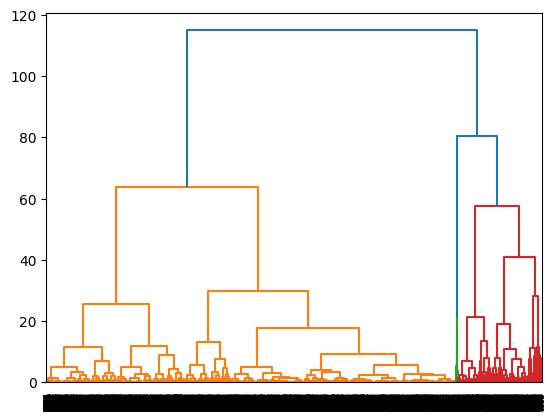

In [ ]:
data_scaled_df = pd.DataFrame(data_scaled)
dendrogram1 = dendrogram(linkage(data_scaled_df, method='ward'))

In [ ]:
linkage_matrix = linkage(data_scaled, method='ward')

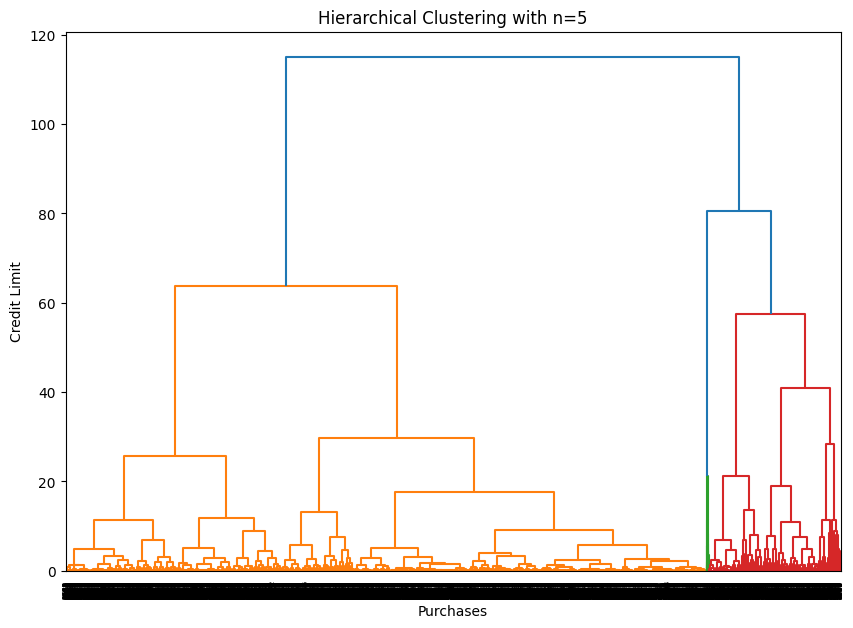

In [ ]:

plt.figure(figsize=(10, 7))
dendrogram(linkage(data_scaled, method='ward'))
plt.title('Hierarchical Clustering with n=5')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.show()

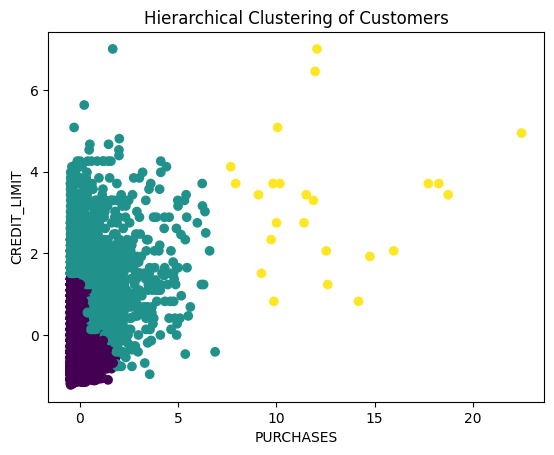

In [ ]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.title('Hierarchical Clustering of Customers')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

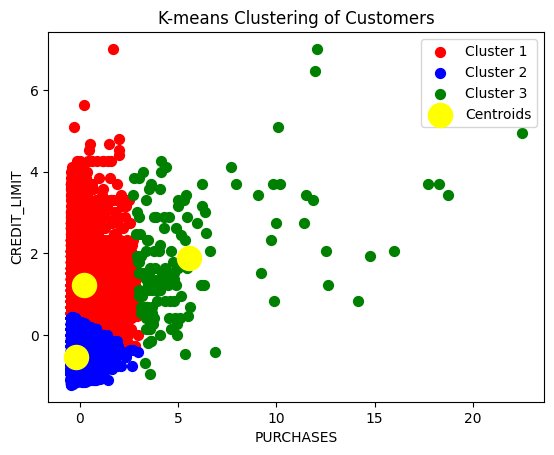

In [ ]:
plt.scatter(data_scaled[clusters == 0, 0], data_scaled[clusters == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(data_scaled[clusters == 1, 0], data_scaled[clusters == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(data_scaled[clusters == 2, 0], data_scaled[clusters == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-means Clustering of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.show()

In [ ]:
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)


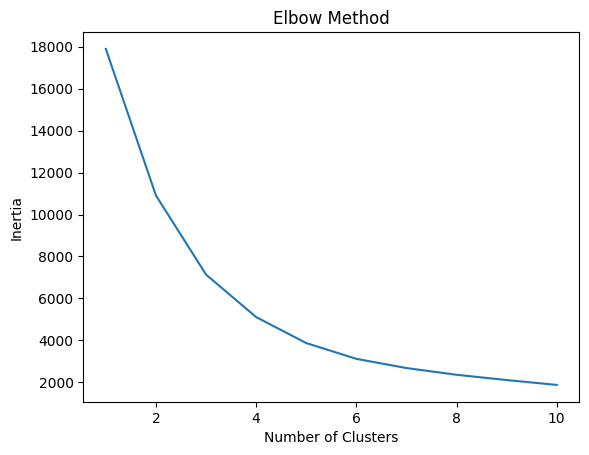

In [ ]:
plt.plot(range(1, 11), inertia_values)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
best_k = np.argmin(np.diff(inertia_values)) + 2
print(f'Best k value: {best_k}')

Best k value: 2


In [ ]:
kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

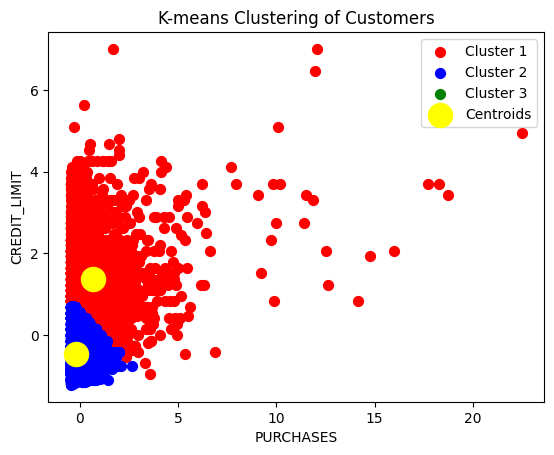

In [ ]:
plt.scatter(data_scaled[clusters == 0, 0], data_scaled[clusters == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(data_scaled[clusters == 1, 0], data_scaled[clusters == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(data_scaled[clusters == 2, 0], data_scaled[clusters == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-means Clustering of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.show()